# Dask vs Numpy
Remember when we compared CUPy with Numpy

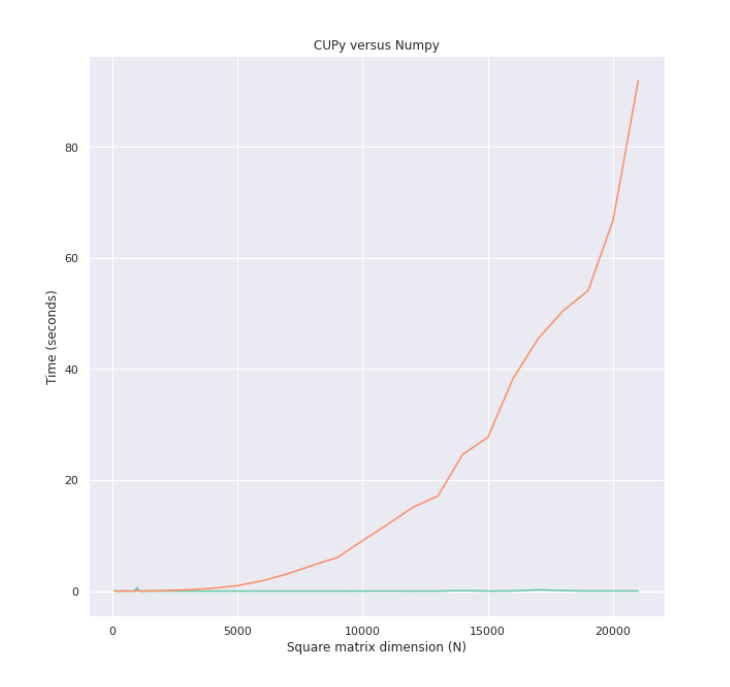

In [1]:
!pip install dask
!pip install tqdm
!pip install seaborn
!pip install faker

     |████████████████████████████████| 1.6 MB 260 kB/s eta 0:00:01


In [2]:
# import libraries
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm, trange
import time
import dask.array as da

In [3]:
N = 100000
x = da.random.random((N,N),chunks=(1000, 1000))
x

dask.array<random_sample, shape=(100000, 100000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

## Dask versus Numpy

In [4]:
def npmultiply( N=10 ):
    a = np.random.rand(N,N)
    b = np.random.rand(N,N)
    t1 = time.time()
    c = np.matmul(a,b,out=None)
    t2 = time.time()
    total = t2-t1
    return total

In [5]:
def daskmultiply( N=10 ):
    a = da.random.random((N,N),chunks=(1000, 1000)) #recs
    b = da.random.random((N,N),chunks=(1000, 1000))
    t1 = time.time()
    c = da.matmul(a,b)
    t2 = time.time()
    total = t2-t1
    return total

In [6]:
# create empty data frame
df = pd.DataFrame(columns=['N','Dask','CPU'])

 # compute statistics
for N in tqdm(range(100,2500,10)):
    df.loc[len(df.index)] = [N+1,daskmultiply(N+1),npmultiply(N+1)]

  0%|          | 0/240 [00:00<?, ?it/s]

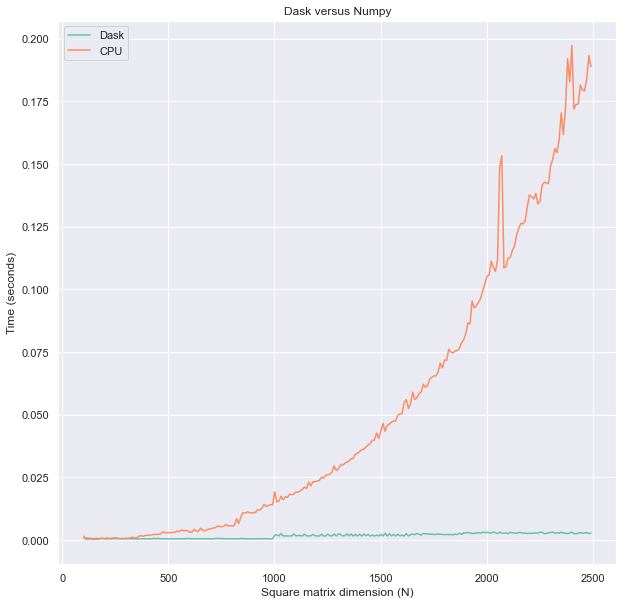

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(10, 10)}) #width=3, #height=4
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(data=df, x='N', y='Dask', label='Dask')
sns.lineplot(data=df, x='N', y='CPU', label='CPU')
plt.title('Dask versus Numpy')
plt.xlabel('Square matrix dimension (N)')
plt.ylabel('Time (seconds)')
plt.legend(loc="upper left")
plt.show()

## Large datasets

In [11]:
from faker import Faker
fake = Faker()
Faker.seed(1234567890)

file = open('fake_dataset.tsv', 'w')
#from header remove address
file.write('SSN\tName\tPhone number\tCompany\tBank\tCredit Card\tCredit Card Expiration\tCredit Card Provider\n')

# not really large
for n in tqdm(range(25000)):
    ssn = fake.ssn()
    name = fake.name()
    address = fake.address() #ignore
    phone_number = fake.phone_number()
    company = fake.company()
    bank = fake.company()
    credit_card = fake.credit_card_number()
    credit_card_expiration = fake.credit_card_expire()
    credit_card_provider = fake.credit_card_provider()
    
    #from here remove {8} and address
    file.write('{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}\n'.format(ssn, name, phone_number,company,bank,credit_card,credit_card_expiration,credit_card_provider))
file.close()

  0%|          | 0/25000 [00:00<?, ?it/s]

In [12]:
file = 'fake_dataset.tsv'

def load_data( file ):
    t1 = time.time()
    df = pd.read_csv( file, sep='\t' )
    t2 = time.time()
    total = t2-t1
    print(total)
    return df

df = load_data( file )

0.0753481388092041


In [13]:
import dask.dataframe as dd

file = 'fake_dataset.tsv'

def load_data2( file ):
    t1 = time.time()
    df = dd.read_csv( file, sep='\t' )
    t2 = time.time()
    total = t2-t1
    print(total)
    return df

df = load_data( file )

0.05368494987487793


## Are you using OpenOnDemand?
Let's try it.

In [14]:
# INSERT CODE HERE
!unzip data.zip

Archive:  data.zip
  inflating: data.tsv                


In [15]:
!du -h data.tsv

175M	data.tsv


In [16]:
!wc -l data.tsv

 1475064 data.tsv


In [24]:
# load dataframe using Pandas

file = 'data.tsv'
df = load_data( file )

3.2118899822235107


In [25]:
file = 'data.tsv'
df2 = load_data2( file )

0.02767801284790039


In [26]:
whos

Variable                 Type         Data/Info
-----------------------------------------------
Faker                    type         <class 'faker.proxy.Faker'>
N                        int          2490
address                  str          263 Tyrone Orchard Apt. 8<...>5\nJessicamouth, MT 13978
bank                     str          Johnson, James and Carpenter
company                  str          Guerrero Inc
credit_card              str          3520599200752059
credit_card_expiration   str          02/24
credit_card_provider     str          Maestro
da                       module       <module 'dask.array' from<...>/dask/array/__init__.py'>
daskmultiply             function     <function daskmultiply at 0x7fd10681a790>
dd                       module       <module 'dask.dataframe' <...>k/dataframe/__init__.py'>
df                       DataFrame                     SSN     <...>1475063 rows x 8 columns]
df2                      DataFrame    Dask DataFrame Structure:<...>k Name: 

In [20]:
df.columns

Index(['SSN', 'Name', 'Phone number', 'Company', 'Bank', 'Credit Card',
       'Credit Card Expiration', 'Credit Card Provider'],
      dtype='object')

In [40]:
df[df['Name'].str.contains('Robert')]

,SSN,Name,Phone number,Company,Bank,Credit Card,Credit Card Expiration,Credit Card Provider
0,598-82-2633,Robert Stafford,417-262-0544x4152,Fields-Henderson,White-Wilkins,213193610434918,08/28,Mastercard
26,805-82-7561,Robert Nicholson MD,(589)665-0061x76712,Williams and Sons,Patton LLC,180042983793484,08/24,Diners Club / Carte Blanche
111,045-18-6128,Robert Garcia,927.033.5004x06423,Ryan-Lewis,Green-Rivera,6543556112856028,07/28,American Express
114,601-55-1168,Robert Davis,876-658-8032x277,Joseph-Ayala,Wells-Chandler,4033800619352,02/26,Discover
221,178-93-0938,Robert Lee,001-986-091-1764x72387,Arnold-White,"Cole, Chandler and Espinoza",38822811885188,06/26,JCB 16 digit
...,...,...,...,...,...,...,...,...
1474739,604-86-1876,Robert Williams,(092)018-6297x105,"Price, Jackson and Estrada",Allison-Orr,30054236920261,09/28,Maestro
1474924,310-13-5276,Chelsey Roberts,036-592-9306x971,Lewis Group,Carpenter-Mckee,3535123534925019,06/29,VISA 16 digit
1474955,077-91-5826,Robert Peterson,+1-282-507-7580x602,Rodriguez Inc,Soto-Johnson,4087194273155434444,07/25,VISA 19 digit
1474957,349-57-1017,Shaun Roberts,440-802-7839x76012,Lee Group,"Jefferson, Griffin and Pennington",4155358594138999,04/29,JCB 16 digit


In [41]:
df2[df2['Name'].str.contains('Robert')] #map

,SSN,Name,Phone number,Company,Bank,Credit Card,Credit Card Expiration,Credit Card Provider
npartitions=3,,,,,,,,
,object,object,object,object,object,int64,object,object
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...


In [42]:
df2[df2['Name'].str.contains('Robert')].compute() #compute

,SSN,Name,Phone number,Company,Bank,Credit Card,Credit Card Expiration,Credit Card Provider
0,598-82-2633,Robert Stafford,417-262-0544x4152,Fields-Henderson,White-Wilkins,213193610434918,08/28,Mastercard
26,805-82-7561,Robert Nicholson MD,(589)665-0061x76712,Williams and Sons,Patton LLC,180042983793484,08/24,Diners Club / Carte Blanche
111,045-18-6128,Robert Garcia,927.033.5004x06423,Ryan-Lewis,Green-Rivera,6543556112856028,07/28,American Express
114,601-55-1168,Robert Davis,876-658-8032x277,Joseph-Ayala,Wells-Chandler,4033800619352,02/26,Discover
221,178-93-0938,Robert Lee,001-986-091-1764x72387,Arnold-White,"Cole, Chandler and Espinoza",38822811885188,06/26,JCB 16 digit
...,...,...,...,...,...,...,...,...
360248,604-86-1876,Robert Williams,(092)018-6297x105,"Price, Jackson and Estrada",Allison-Orr,30054236920261,09/28,Maestro
360433,310-13-5276,Chelsey Roberts,036-592-9306x971,Lewis Group,Carpenter-Mckee,3535123534925019,06/29,VISA 16 digit
360464,077-91-5826,Robert Peterson,+1-282-507-7580x602,Rodriguez Inc,Soto-Johnson,4087194273155434444,07/25,VISA 19 digit
360466,349-57-1017,Shaun Roberts,440-802-7839x76012,Lee Group,"Jefferson, Griffin and Pennington",4155358594138999,04/29,JCB 16 digit
